In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_1407676/2865047199.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('electronics_small.csv')


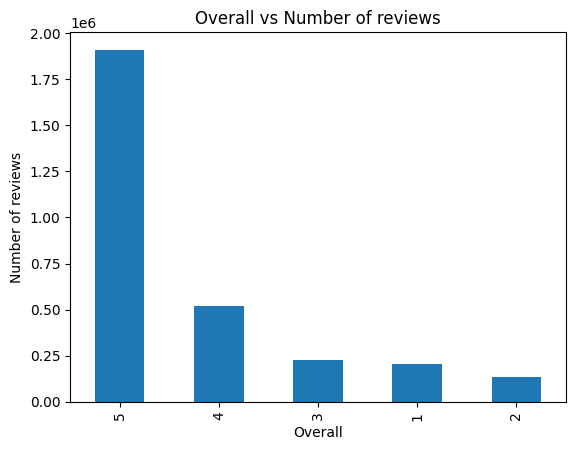

In [1]:
# Read the electronics_small.csv file and exatrct only columns(overall,reviewText) and give a data distribution of the overall column in the form of a histogram The overall clumn is discrete and ranges from 1 to 5. The histogram should have 5 bins, one for each possible value of the overall column. The x-axis should be the possible values of the overall column and the y-axis should be the number of reviews that have that overall value. The histogram should be displayed in a window.


data = pd.read_csv('electronics_small.csv')
data = data[['overall','reviewText']]
data = data.dropna()
data = data.reset_index(drop=True)
data['overall'].value_counts().plot(kind='bar')
plt.xlabel('Overall')
plt.ylabel('Number of reviews')
plt.title('Overall vs Number of reviews')
plt.show()





      overall                                         reviewText
0           1  Received the shipment on-time, but the first t...
1           1  I've had mine for a year and here's what we go...
2           3  Believe it or not, some of us still use VHS  O...
3           1  These are pretty cool mp3 players with some ni...
4           3  I had and still have an older model Nook table...
...       ...                                                ...
1995        2  Hello Fellow Amazonians I read the lows and hi...
1996        4  If you are new to the Mac operating system or ...
1997        2  I put this into my SGS4 and while it worked, t...
1998        4  So this is a very simple, paper-bound album wi...
1999        3  These work for the itouch 64gb but they someti...

[2000 rows x 2 columns]


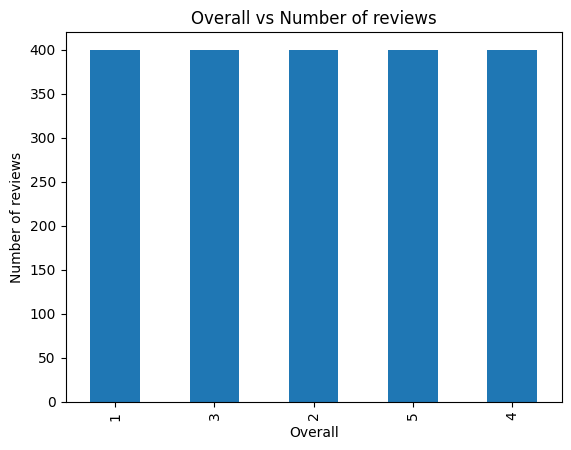

   overall                                         reviewText
0        1  Received the shipment on-time, but the first t...
1        1  I've had mine for a year and here's what we go...
2        3  Believe it or not, some of us still use VHS  O...
3        1  These are pretty cool mp3 players with some ni...
4        3  I had and still have an older model Nook table...


In [7]:
#Now create a small dataset with 2000 where the dataset is balanced with respect to the overall column. That is, there are 400 reviews with overall 1, 400 reviews with overall 2, 400 reviews with overall 3, 400 reviews with overall 4, and 400 reviews with overall 5. Save this dataset to a new csv file called electronics_small_balanced.csv.
# remove the rows with missing values in the overall and reviewText columns
# The whole review text should be in one line. That is, there should be no newline characters in the reviewText column. You can use the following code to remove newline characters from a string s: s = s.replace('\n', ' ')
# The review text column is str and the overall column is int. You can use the following code to convert the overall column to str: data['overall'] = data['overall'].astype(str)

# the review text column sould have atleast 30 words in it. You can use the following code to remove rows where the review text column has less than 30 words: data = data[data['reviewText'].apply(lambda x: len(x.split())>=30)]
data = data.dropna()
data = data.reset_index(drop=True)

data = data[data['reviewText'].apply(lambda x: len(x.split())>=30)]
data['reviewText'] = data['reviewText'].apply(lambda x: x.replace('\n',' '))

data1 = data[data['overall']==1].head(400)
data2 = data[data['overall']==2].head(400)
data3 = data[data['overall']==3].head(400)
data4 = data[data['overall']==4].head(400)
data5 = data[data['overall']==5].head(400)
data_balanced = pd.concat([data1,data2,data3,data4,data5])

# shuffle the rows of the balanced dataset
data_balanced = data_balanced.sample(frac=1).reset_index(drop=True)

data_balanced.to_csv('electronics_small_balanced.csv',index=False)
print(data_balanced)

#plot the histogram of the overall column for the balanced dataset. The histogram should have 5 bins, one for each possible value of the overall column. The x-axis should be the possible values of the overall column and the y-axis should be the number of reviews that have that overall value. The histogram should be displayed in a window.

data_balanced['overall'].value_counts().plot(kind='bar')
plt.xlabel('Overall')
plt.ylabel('Number of reviews')
plt.title('Overall vs Number of reviews')
plt.show()

# aslo show some of the reviews from the balanced dataset
print(data_balanced.head(5))



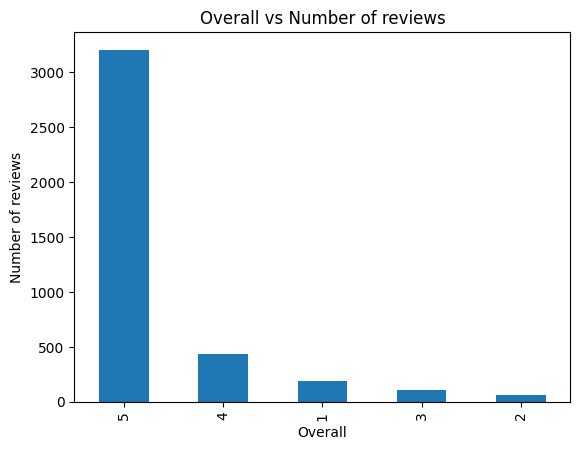

/tmp/ipykernel_1407676/3046141588.py:10: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('electronics_small.csv')


194 62 106 433 3204


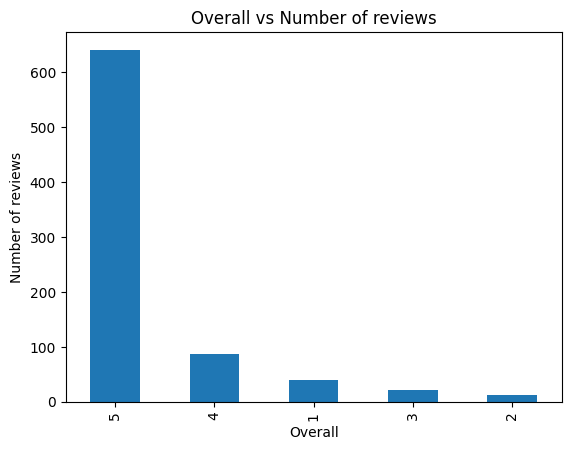

In [4]:
# First check the data distribution of data.csv file for the overall column. The overall clumn is discrete and ranges from 1 to 5. The histogram should have 5 bins, one for each possible value of the overall column. 

d = pd.read_csv('data.csv')
d['overall'].value_counts().plot(kind='bar')
plt.xlabel('Overall')
plt.ylabel('Number of reviews')
plt.title('Overall vs Number of reviews')
plt.show()

data = pd.read_csv('electronics_small.csv')
data = data[['overall','reviewText']]
data = data.dropna()
data = data.reset_index(drop=True)
data = data[data['reviewText'].apply(lambda x: len(x.split())>=30)]
data['reviewText'] = data['reviewText'].apply(lambda x: x.replace('\n',' '))



overall_distribution = d['overall'].value_counts()
noof_reviews_1 = overall_distribution[1]
noof_reviews_2 = overall_distribution[2]
noof_reviews_3 = overall_distribution[3]
noof_reviews_4 = overall_distribution[4]
noof_reviews_5 = overall_distribution[5]

print(noof_reviews_1,noof_reviews_2,noof_reviews_3,noof_reviews_4,noof_reviews_5)

import math
# take 20% of the noof_reviews_1 from the electronics_small.csv file (use ceil function to round up to the nearest integer). Similarly, take 20% of the noof_reviews_2, 20% of the noof_reviews_3, 20% of the noof_reviews_4, and 20% of the noof_reviews_5. Save these reviews to a new csv file called electronics_validation.csv. The validation dataset should be balanced with respect to the overall column. That is, there should be 20% of the reviews with overall 1, 20% of the reviews with overall 2, 20% of the reviews with overall 3, 20% of the reviews with overall 4, and 20% of the reviews with overall 5.
data1 = data[data['overall']==1].head(math.ceil(noof_reviews_1*0.2))
data2 = data[data['overall']==2].head(math.ceil(noof_reviews_2*0.2))
data3 = data[data['overall']==3].head(math.ceil(noof_reviews_3*0.2))
data4 = data[data['overall']==4].head(math.ceil(noof_reviews_4*0.2))
data5 = data[data['overall']==5].head(math.ceil(noof_reviews_5*0.2))
data_validation = pd.concat([data1,data2,data3,data4,data5])

# shuffle the rows of the validation dataset
data_validation = data_validation.sample(frac=1).reset_index(drop=True)

data_validation.to_csv('electronics_validation.csv',index=False)

# plot the histogram of the overall column for the validation dataset. The histogram should have 5 bins, one for each possible value of the overall column. The x-axis should be the possible values of the overall column and the y-axis should be the number of reviews that have that overall value. The histogram should be displayed in a window.

data_validation['overall'].value_counts().plot(kind='bar')
plt.xlabel('Overall')
plt.ylabel('Number of reviews')
plt.title('Overall vs Number of reviews')
plt.show()





In [1]:
# Load the dataset
from datasets import load_dataset

ds = load_dataset("stanfordnlp/sst2")

# Print the dataset
print(ds)


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})


In [2]:
# Print the first 5 examples of the training set

print(ds['train'][0:5])


{'idx': [0, 1, 2, 3, 4], 'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature ', 'remains utterly satisfied to remain the same throughout ', 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up '], 'label': [0, 0, 1, 0, 0]}


In [6]:
# Create SST2.csv file with following column names 'overall' and 'reviewText'. The 'overall' column should be the label column and 'reviewText' column should be the text column. The 'overall' column should be 0 for negative reviews and 1 for positive reviews. Save the dataset to a new csv file called SST2.csv.
# store in data folder with SST2 folder and create all the train, test and validation csv files
import pandas as pd
import csv
import os

os.makedirs('data/SST2',exist_ok=True)

train = ds['train']
test = ds['test']
validation = ds['validation']

train_data = pd.DataFrame(train)
test_data = pd.DataFrame(test)
validation_data = pd.DataFrame(validation)

train_data['overall'] = train_data['label'].apply(lambda x: 1 if x==1 else 0)
test_data['overall'] = test_data['label'].apply(lambda x: 1 if x==1 else 0)
validation_data['overall'] = validation_data['label'].apply(lambda x: 1 if x==1 else 0)

train_data = train_data[['overall','sentence']]
test_data = test_data[['overall','sentence']]
validation_data = validation_data[['overall','sentence']]
train_data.columns = ['overall','reviewText']
test_data.columns = ['overall','reviewText']
validation_data.columns = ['overall','reviewText']

train_data.to_csv('data/SST2/train.csv',index=False)
test_data.to_csv('data/SST2/test.csv',index=False)
validation_data.to_csv('data/SST2/validation.csv',index=False)

# Print the first 5 examples of the training set
print(train_data.head(5))

# Print the first 5 examples of the test set
print(test_data.head(5))

# Print the first 5 examples of the validation set
print(validation_data.head(5))


   overall                                         reviewText
0        0       hide new secretions from the parental units 
1        0               contains no wit , only labored gags 
2        1  that loves its characters and communicates som...
3        0  remains utterly satisfied to remain the same t...
4        0  on the worst revenge-of-the-nerds clichés the ...
   overall                                         reviewText
0        0             uneasy mishmash of styles and genres .
1        0  this film 's relationship to actual tension is...
2        0  by the end of no such thing the audience , lik...
3        0  director rob marshall went out gunning to make...
4        0  lathan and diggs have considerable personal ch...
   overall                                         reviewText
0        1    it 's a charming and often affecting journey . 
1        0                 unflinchingly bleak and desperate 
2        1  allows us to hope that nolan is poised to emba...
3       

In [ ]:
data = ds['train']
# data = pd.DataFrame(data)
# data = data[['label','sentence']]
# data.columns = ['overall','reviewText']
# data['overall'] = data['overall'].apply(lambda x: 1 if x==1 else 0)

# data.to_csv('data/SST2.csv',index=False)
# print(data.head(5))